In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
plt.style.use('ggplot')
warnings.filterwarnings('ignore')

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic-updated/train.csv


In [2]:
data = pd.read_csv('/kaggle/input/titanic-updated/train.csv')
np.random.seed(42)

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.shape

(891, 12)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,889.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.604241,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.123850,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,21.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              2
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [8]:
X_test = pd.read_csv('/kaggle/input/titanic/test.csv')
p_id = X_test['PassengerId']
X_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [9]:
title_list=['Mrs', 'Mr', 'Master', 'Miss', 'Major', 'Rev',
                    'Dr', 'Ms', 'Mlle','Col', 'Capt', 'Mme', 'Countess',
                    'Don', 'Jonkheer']
def get_title(name):
    for title in title_list:
        if title in name:
            return title

def get_cabin(cabin):
    for letter in ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T']:
        if letter in cabin:
            return letter
    return 'none'
        
data.dropna(subset=['Age'], inplace=True, axis=0)
    
data['Title'] = data['Name'].apply(get_title)

data['Cabin'].fillna('unknown', inplace=True)
data['Cabin_cat'] = data['Cabin'].apply(get_cabin)

data['Family_size'] = data['SibSp'] + data['Parch']

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Cabin_cat,Family_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,unknown,S,Mr,none,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,unknown,S,Miss,none,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,C,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,unknown,S,Mr,none,0


In [10]:
data.isna().sum().sum()

0

In [11]:
data[['Sex', 'Ticket', 'Cabin_cat', 'Embarked', 'Title']].describe()

,Sex,Ticket,Cabin_cat,Embarked,Title
count,889,889,889,889,889
unique,2,679,9,3,15
top,male,1601,none,S,Mr
freq,575,7,685,646,516


In [12]:
data = data.drop(['Name', 'PassengerId', 'Ticket', 'Cabin'], axis=1)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Cabin_cat,Family_size
0,0,3,male,22.0,1,0,7.2500,S,Mr,none,1
1,1,1,female,38.0,1,0,71.2833,C,Mrs,C,1
2,1,3,female,26.0,0,0,7.9250,S,Miss,none,0
3,1,1,female,35.0,1,0,53.1000,S,Mrs,C,1
4,0,3,male,35.0,0,0,8.0500,S,Mr,none,0


In [13]:
data.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare,Family_size
Survived,1.000000,-0.337508,-0.061254,-0.036200,0.080865,0.256687,0.015659
Pclass,-0.337508,1.000000,-0.380703,0.084051,0.019344,-0.549160,0.067117
Age,-0.061254,-0.380703,1.000000,-0.274092,-0.189311,0.111537,-0.281938
SibSp,-0.036200,0.084051,-0.274092,1.000000,0.414542,0.159212,0.890654
Parch,0.080865,0.019344,-0.189311,0.414542,1.000000,0.215816,0.782988
Fare,0.256687,-0.549160,0.111537,0.159212,0.215816,1.000000,0.216656
Family_size,0.015659,0.067117,-0.281938,0.890654,0.782988,0.216656,1.000000


array([[<AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'SibSp'}>,
        <AxesSubplot:title={'center':'Parch'}>,
        <AxesSubplot:title={'center':'Fare'}>],
       [<AxesSubplot:title={'center':'Family_size'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

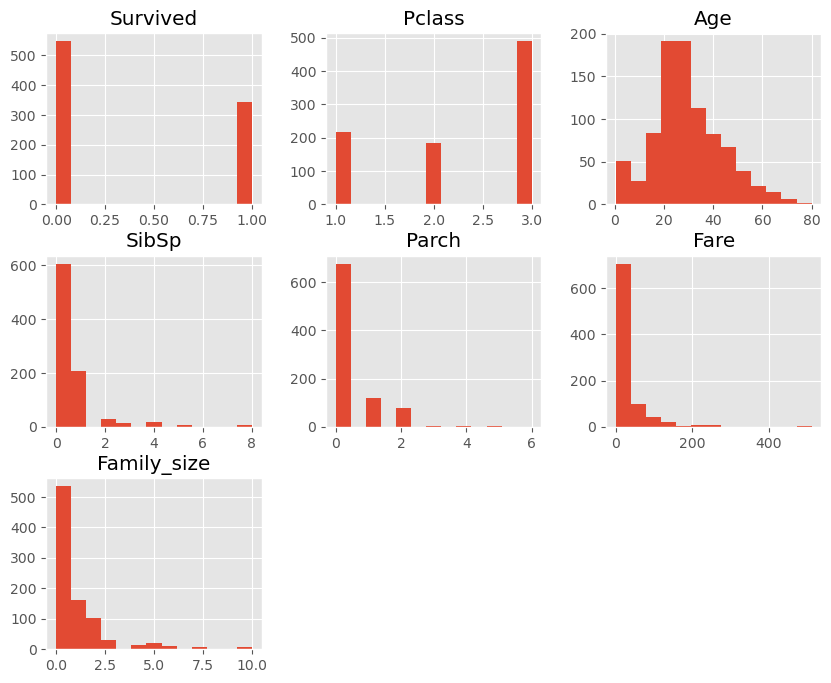

In [14]:
data.hist(bins=13, figsize=(10, 8))

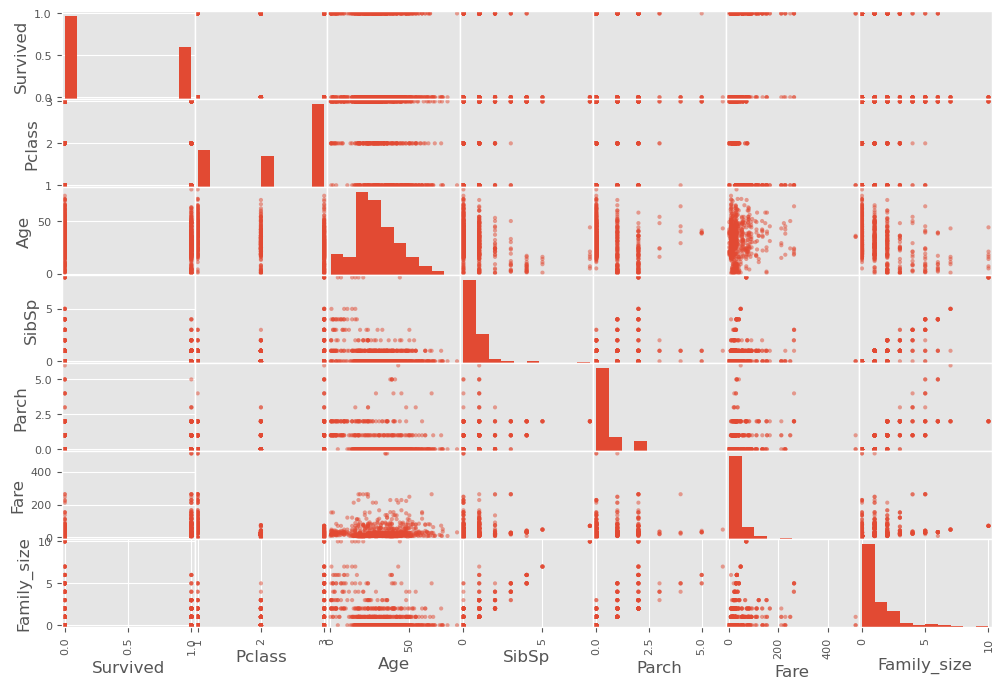

In [15]:
from pandas.plotting import scatter_matrix

scatter_matrix(data, figsize=(12, 8))
plt.show()

<AxesSubplot:>

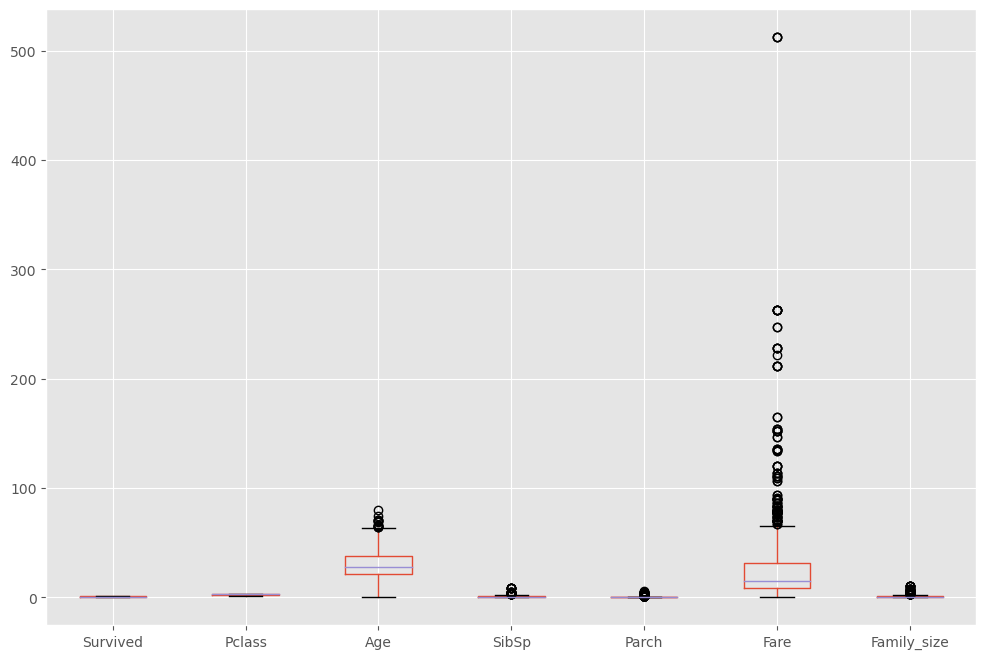

In [16]:
data.boxplot(figsize=(12, 8))

In [17]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_selector


cat_cols = ['Sex', 'Cabin_cat', 'Embarked', 'Title']

ct = ColumnTransformer([('encoder', OneHotEncoder(categories='auto', handle_unknown='ignore'),
                         cat_cols)], remainder='passthrough',
                         verbose_feature_names_out=False)
encoded_data = ct.fit_transform(data)
encoded_df = pd.DataFrame(encoded_data, columns=ct.get_feature_names_out())
encoded_df

,Sex_female,Sex_male,Cabin_cat_A,Cabin_cat_B,Cabin_cat_C,Cabin_cat_D,Cabin_cat_E,Cabin_cat_F,Cabin_cat_G,Cabin_cat_T,...,Title_Mrs,Title_Ms,Title_Rev,Survived,Pclass,Age,SibSp,Parch,Fare,Family_size
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,22.0,1.0,0.0,7.2500,1.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,38.0,1.0,0.0,71.2833,1.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,3.0,26.0,0.0,0.0,7.9250,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,35.0,1.0,0.0,53.1000,1.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,35.0,0.0,0.0,8.0500,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,2.0,27.0,0.0,0.0,13.0000,0.0
885,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,19.0,0.0,0.0,30.0000,0.0
886,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,7.0,1.0,2.0,23.4500,3.0
887,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,26.0,0.0,0.0,30.0000,0.0


In [18]:
X, y = encoded_df.drop('Survived', axis=1), encoded_df['Survived']

In [19]:
from sklearn.model_selection import cross_val_score, learning_curve

def cvs(model):
    print(pd.Series(cross_val_score(model, X, y, scoring='accuracy', cv=10)).describe())
    
def plot_learning_curve(model):
    train_sizes, train_scores, valid_scores = learning_curve(model, X, y,
                                                             train_sizes=np.linspace(0.1, 1.0, 25),
                                                             cv=5, scoring='accuracy')
    
    train_errors = train_scores.mean(axis=1)
    valid_errors = valid_scores.mean(axis=1)
    
    plt.plot(train_sizes, train_errors, "r", linewidth=2, label='training')
    plt.plot(train_sizes, valid_errors, "g", linewidth=2, label='validation')
    plt.legend()                                                         
    plt.show()

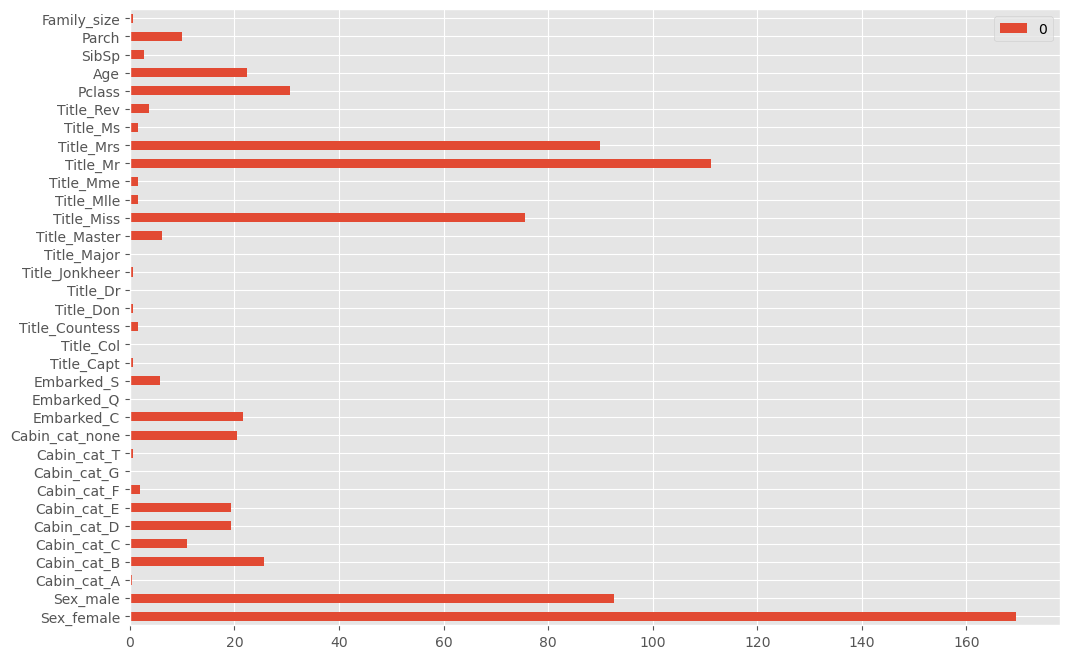

In [20]:
from sklearn.feature_selection import SelectKBest, chi2

features = SelectKBest(score_func=chi2, k='all')
scores = pd.DataFrame(features.fit(X.drop('Fare', axis=1), y).scores_, index=X.drop('Fare', axis=1).columns)

scores.plot(kind='barh', figsize=(12,8))
plt.show()

count    10.000000
mean      0.814441
std       0.037357
min       0.741573
25%       0.789326
50%       0.831461
75%       0.839888
max       0.853933
dtype: float64


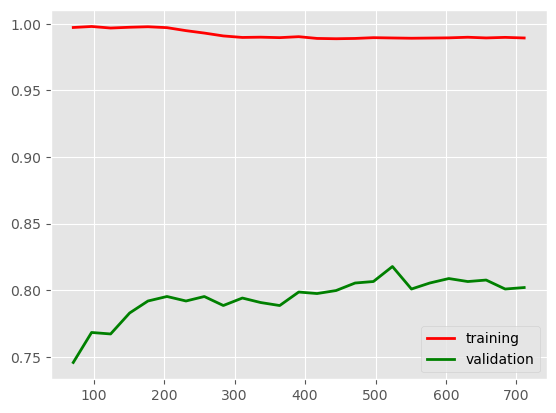

In [21]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=200)
cvs(model)
plot_learning_curve(model)

max value is 6


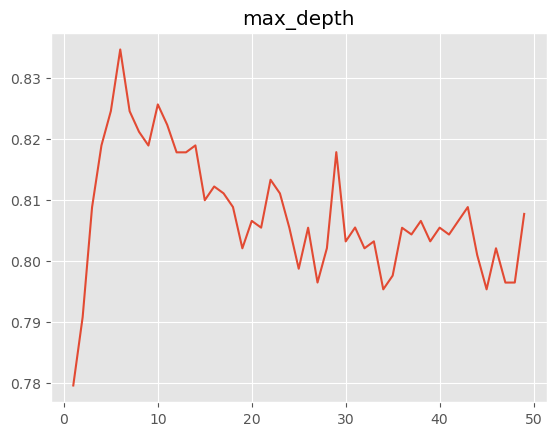

In [22]:
curve = []
hp_vals = range(1, 50)
for val in hp_vals:
    model = RandomForestClassifier(max_depth=val)
    mean_cvs = np.mean(cross_val_score(model, X, y, cv=5, scoring='accuracy'))
    curve.append(mean_cvs)
    
print('max value is', hp_vals[curve.index(max(curve))])

plt.plot(hp_vals, curve)
plt.title('max_depth')
plt.show()

max value is 30


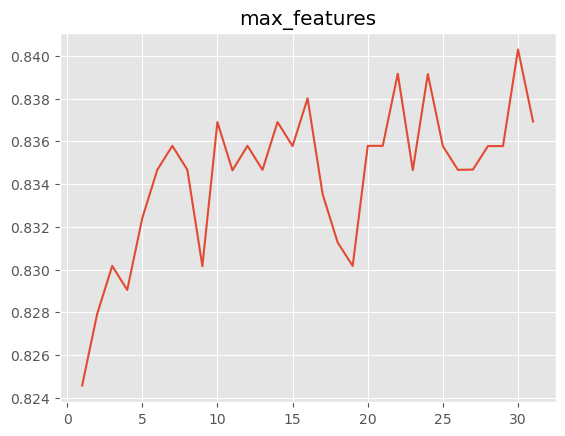

In [23]:
curve = []
hp_vals = range(1, 32)
for val in hp_vals:
    model = RandomForestClassifier(max_depth=6, max_features=val)
    mean_cvs = np.mean(cross_val_score(model, X, y, cv=10, scoring='accuracy'))
    curve.append(mean_cvs)
    
print('max value is', hp_vals[curve.index(max(curve))])

plt.plot(hp_vals, curve)
plt.title('max_features')
plt.show()

max value is 5


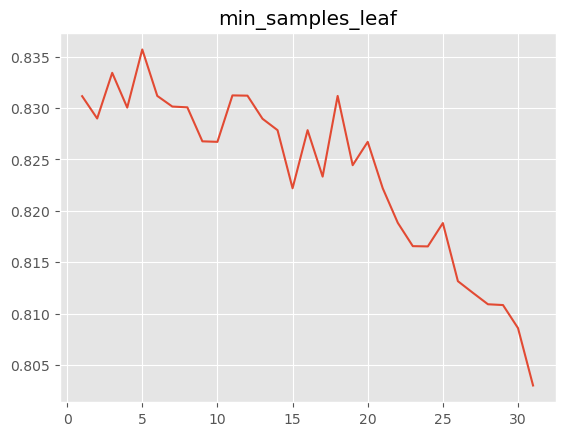

In [24]:
curve = []
hp_vals = range(1, 32)
for val in hp_vals:
    model = RandomForestClassifier(max_features=11, max_depth=6, min_samples_leaf=val)
    mean_cvs = np.mean(cross_val_score(model, X, y, cv=20, scoring='accuracy'))
    curve.append(mean_cvs)
    
print('max value is', hp_vals[curve.index(max(curve))])

plt.plot(hp_vals, curve)
plt.title('min_samples_leaf')
plt.show()

max value is 25


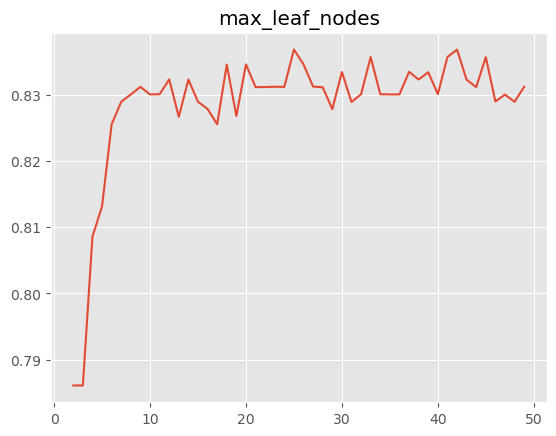

In [25]:
curve = []
hp_vals = range(2, 50)
for val in hp_vals:
    model = RandomForestClassifier(max_features=11, max_depth=6, min_samples_leaf=9, max_leaf_nodes=val)
    mean_cvs = np.mean(cross_val_score(model, X, y, cv=20, scoring='accuracy'))
    curve.append(mean_cvs)
    
print('max value is', hp_vals[curve.index(max(curve))])

plt.plot(hp_vals, curve)
plt.title('max_leaf_nodes')
plt.show()

max value is 2


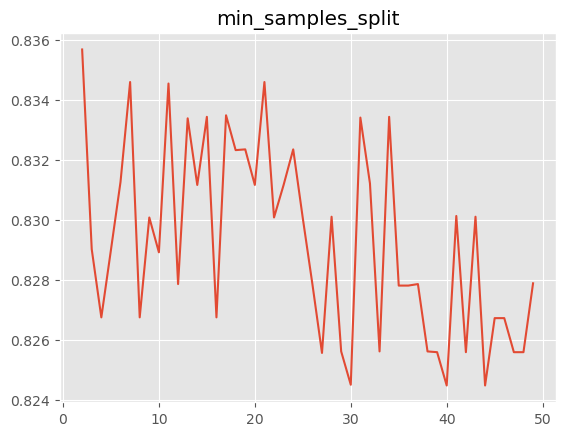

In [26]:
curve = []
hp_vals = range(2, 50)
for val in hp_vals:
    model = RandomForestClassifier(max_features=11, max_depth=6, min_samples_leaf=9,
                                   max_leaf_nodes=40, min_samples_split=val)
    mean_cvs = np.mean(cross_val_score(model, X, y, cv=20, scoring='accuracy'))
    curve.append(mean_cvs)
    
print('max value is', hp_vals[curve.index(max(curve))])

plt.plot(hp_vals, curve)
plt.title('min_samples_split')
plt.show()

max value is 400


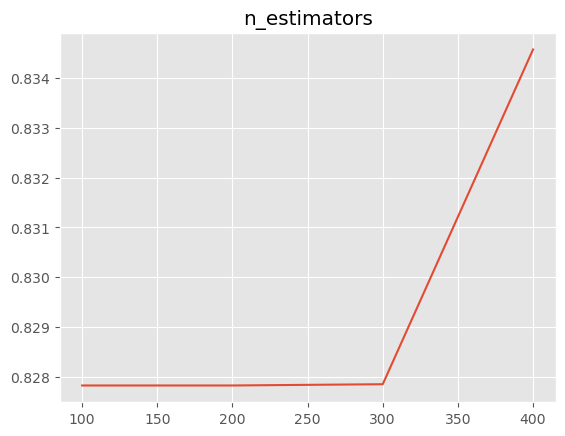

In [27]:
curve = []
hp_vals = [100, 200, 300, 400]
for val in hp_vals:
    model = RandomForestClassifier(max_features=11, max_depth=6, min_samples_leaf=9,
                                   max_leaf_nodes=40, min_samples_split=12, n_estimators=val)
    mean_cvs = np.mean(cross_val_score(model, X, y, cv=20, scoring='accuracy'))
    curve.append(mean_cvs)
    
print('max value is', hp_vals[curve.index(max(curve))])

plt.plot(hp_vals, curve)
plt.title('n_estimators')
plt.show()

count    10.000000
mean      0.831295
std       0.038090
min       0.764045
25%       0.811798
50%       0.847485
75%       0.853933
max       0.876404
dtype: float64


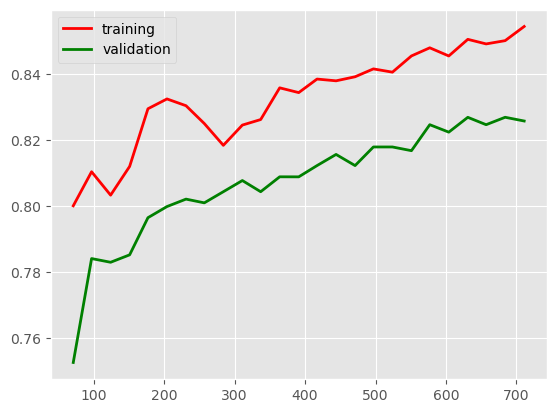

In [28]:
random_forest = RandomForestClassifier(max_features=11, max_depth=6, min_samples_leaf=9,
                                       max_leaf_nodes=40, min_samples_split=12, n_estimators=300)

cvs(model)
plot_learning_curve(model)

In [29]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

scaler = ColumnTransformer([
    ('scaler', StandardScaler(), make_column_selector(dtype_include=np.number))
])

count    10.000000
mean      0.830146
std       0.034912
min       0.775281
25%       0.822555
50%       0.831461
75%       0.848315
max       0.876404
dtype: float64


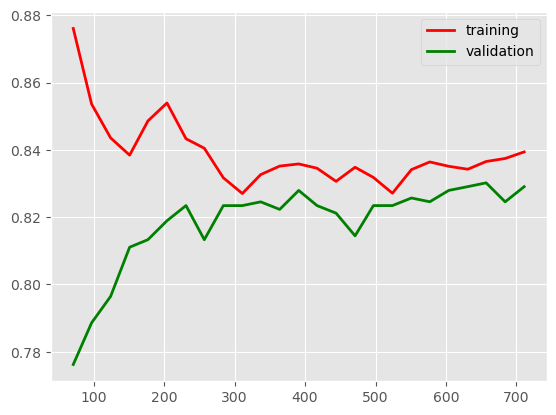

In [30]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

cvs(model)
plot_learning_curve(model)

max value is 0.7000000000000002


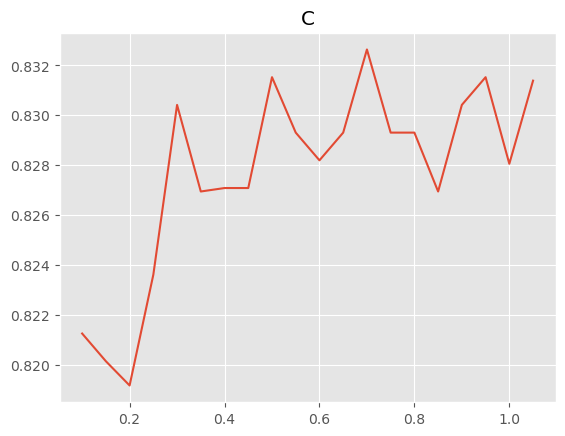

In [31]:
curve = []
hp_vals = np.arange(0.1, 1.1, 0.05)
for val in hp_vals:
    model = LogisticRegression(C=val)
    mean_cvs = np.mean(cross_val_score(model, X, y, cv=100, scoring='accuracy'))
    curve.append(mean_cvs)
    
print('max value is', hp_vals[curve.index(max(curve))])

plt.plot(hp_vals, curve)
plt.title('C')
plt.show()

count    10.000000
mean      0.809921
std       0.043076
min       0.752809
25%       0.780899
50%       0.803371
75%       0.830982
max       0.898876
dtype: float64


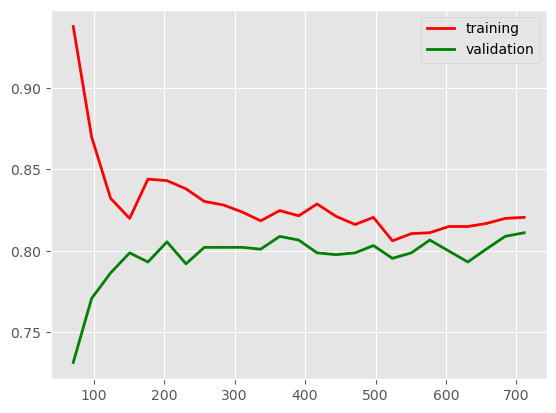

In [32]:
from sklearn.preprocessing import PolynomialFeatures #not better

poly = PolynomialFeatures(degree=2, include_bias=False)
model = make_pipeline(poly, LogisticRegression(C=0.7))

cvs(model)
plot_learning_curve(model)

count    10.000000
mean      0.831295
std       0.028383
min       0.786517
25%       0.823034
50%       0.831461
75%       0.849879
max       0.876404
dtype: float64


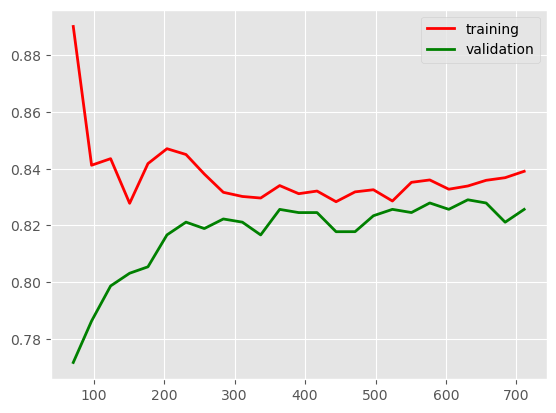

In [33]:
log_reg = LogisticRegression(C=0.7)

cvs(log_reg)
plot_learning_curve(log_reg)

count    10.000000
mean      0.749106
std       0.072660
min       0.606742
25%       0.716292
50%       0.752809
75%       0.764045
max       0.887640
dtype: float64


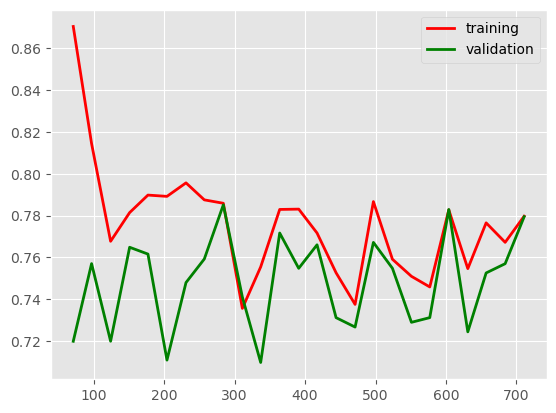

In [34]:
from sklearn.linear_model import SGDClassifier

model = make_pipeline(scaler, SGDClassifier())
cvs(model)
plot_learning_curve(model)

max value is l1


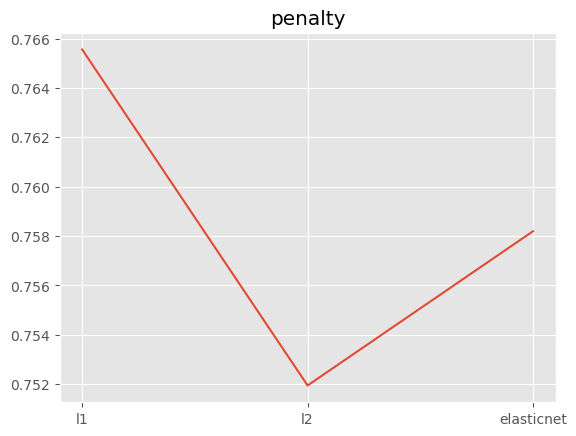

In [35]:
curve = []
hp_vals = ['l1', 'l2', 'elasticnet']
for val in hp_vals:
    model = make_pipeline(scaler, SGDClassifier(penalty=val))
    mean_cvs = np.mean(cross_val_score(model, X, y, cv=100, scoring='accuracy'))
    curve.append(mean_cvs)
    
print('max value is', hp_vals[curve.index(max(curve))])

plt.plot(hp_vals, curve)
plt.title('penalty')
plt.show()

max value is 0.1


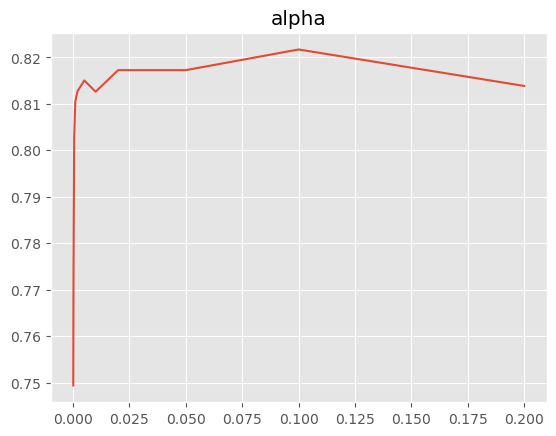

In [36]:
curve = []
hp_vals = [0.0001, 0.0002, 0.0005, 0.001, 0.002, 0.005, 0.01, 0.02, 0.05, 0.1, 0.2]
for val in hp_vals:
    model = make_pipeline(scaler, SGDClassifier(penalty='l2', alpha=val))
    mean_cvs = np.mean(cross_val_score(model, X, y, cv=50, scoring='accuracy'))
    curve.append(mean_cvs)
    
print('max value is', hp_vals[curve.index(max(curve))])

plt.plot(hp_vals, curve)
plt.title('alpha')
plt.show()

count    10.000000
mean      0.820033
std       0.034262
min       0.764045
25%       0.800562
50%       0.830503
75%       0.831461
max       0.876404
dtype: float64


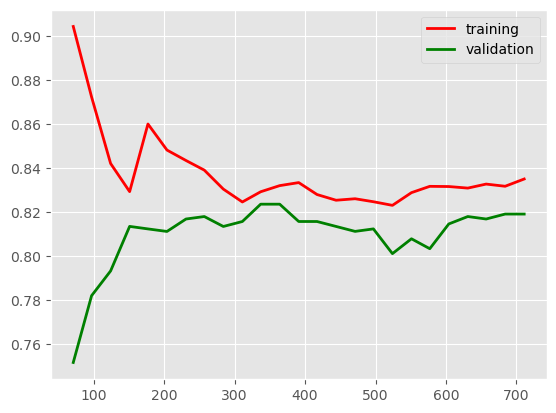

In [37]:
sgdc = make_pipeline(scaler, SGDClassifier(penalty='l2', alpha=0.01))
cvs(sgdc)
plot_learning_curve(sgdc)

count    10.000000
mean      0.821170
std       0.033981
min       0.775281
25%       0.797753
50%       0.825843
75%       0.842250
max       0.876404
dtype: float64


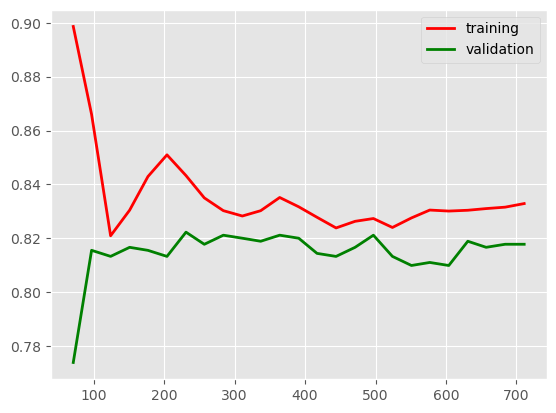

In [38]:
from sklearn.svm import SVC


model = make_pipeline(scaler, SVC(kernel='linear'))

cvs(model)
plot_learning_curve(model)

max value is 0.1


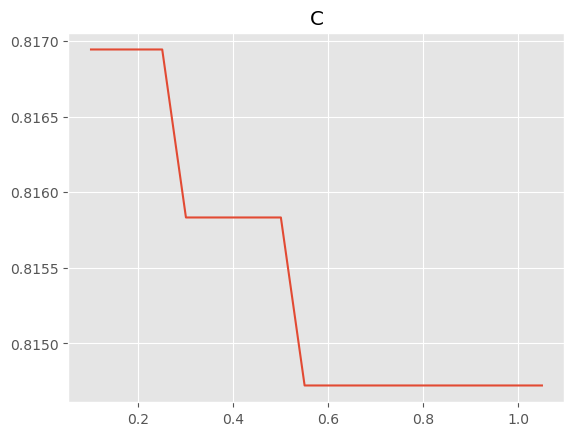

In [39]:
curve = []
hp_vals = np.arange(0.1, 1.1, 0.05)
for val in hp_vals:
    model = make_pipeline(scaler, SVC(kernel='linear', C=val))
    mean_cvs = np.mean(cross_val_score(model, X, y, cv=100, scoring='accuracy'))
    curve.append(mean_cvs)
    
print('max value is', hp_vals[curve.index(max(curve))])

plt.plot(hp_vals, curve)
plt.title('C')
plt.show()

count    10.000000
mean      0.820046
std       0.035804
min       0.764045
25%       0.797753
50%       0.825843
75%       0.842250
max       0.876404
dtype: float64


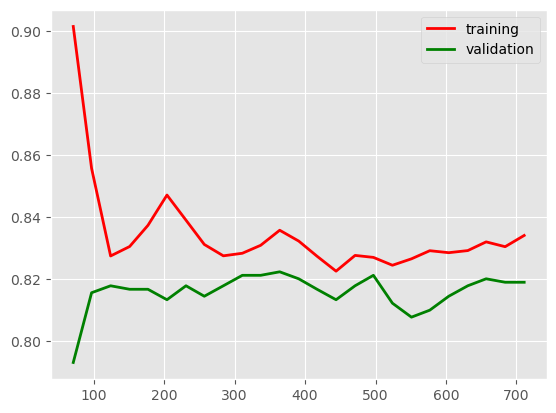

In [40]:
svc_model = make_pipeline(scaler, SVC(kernel='linear', C=0.2))

cvs(svc_model)
plot_learning_curve(svc_model)

count    10.000000
mean      0.821170
std       0.033981
min       0.775281
25%       0.797753
50%       0.825843
75%       0.842250
max       0.876404
dtype: float64


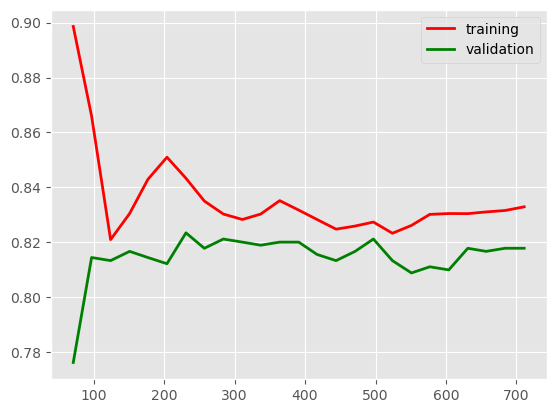

In [41]:
from sklearn.ensemble import GradientBoostingClassifier

gradient_boosting = GradientBoostingClassifier()

cvs(model)
plot_learning_curve(model)

count    10.000000
mean      0.805401
std       0.029495
min       0.752809
25%       0.797753
50%       0.807903
75%       0.820225
max       0.842697
dtype: float64


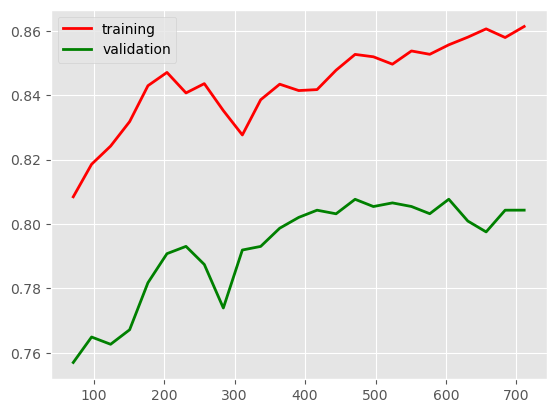

In [42]:
from sklearn.neighbors import KNeighborsClassifier

model = make_pipeline(scaler, KNeighborsClassifier())

cvs(model)
plot_learning_curve(model)

max value is 20


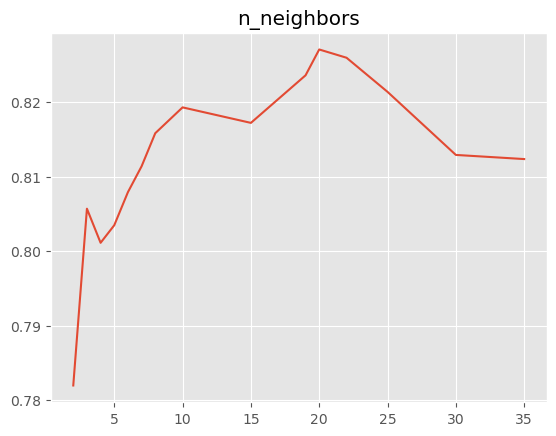

In [43]:
curve = []
hp_vals = [2, 3, 4, 5, 6, 7, 8, 10, 15, 19, 20, 22, 25, 30, 35]
for val in hp_vals:
    model = make_pipeline(scaler, KNeighborsClassifier(n_neighbors=val))
    mean_cvs = np.mean(cross_val_score(model, X, y, cv=100, scoring='accuracy'))
    curve.append(mean_cvs)
    
print('max value is', hp_vals[curve.index(max(curve))])

plt.plot(hp_vals, curve)
plt.title('n_neighbors')
plt.show()

max value is uniform


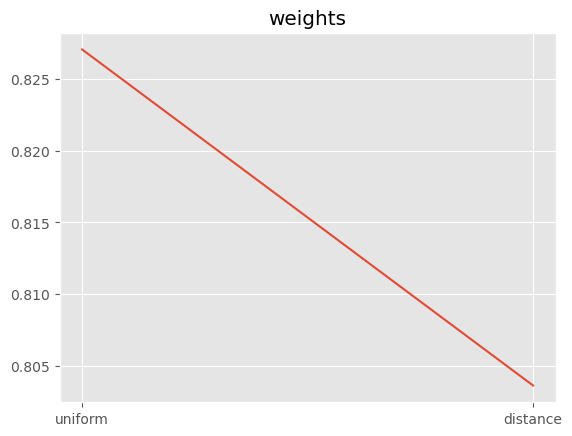

In [44]:
curve = []
hp_vals = ['uniform', 'distance']
for val in hp_vals:
    model = make_pipeline(scaler, KNeighborsClassifier(n_neighbors=20, weights=val))
    mean_cvs = np.mean(cross_val_score(model, X, y, cv=100, scoring='accuracy'))
    curve.append(mean_cvs)
    
print('max value is', hp_vals[curve.index(max(curve))])

plt.plot(hp_vals, curve)
plt.title('weights')
plt.show()

count    10.000000
mean      0.804316
std       0.038074
min       0.752809
25%       0.778090
50%       0.792135
75%       0.838547
max       0.865169
dtype: float64


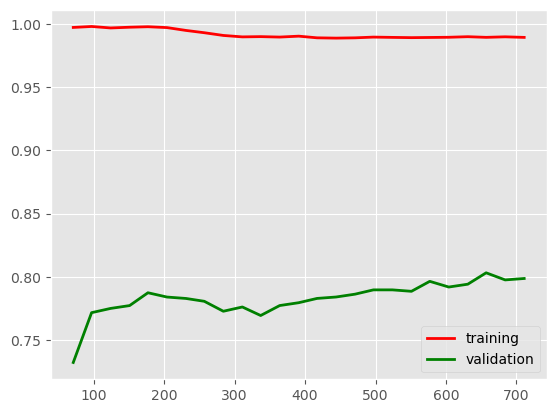

In [45]:
knc_model = make_pipeline(scaler, KNeighborsClassifier(n_neighbors=20))

cvs(model)
plot_learning_curve(model)

In [46]:
from sklearn.ensemble import VotingClassifier

voting_classifier = VotingClassifier(estimators=[('random_forest', random_forest), ('logreg', log_reg), ('SGD_classifier', sgdc),
                                                 ('SVM_classifier', svc_model), ('gradient_boosting', gradient_boosting)])

voting_classifier.fit(X, y)

VotingClassifier(estimators=[('random_forest',
                              RandomForestClassifier(max_depth=6,
                                                     max_features=11,
                                                     max_leaf_nodes=40,
                                                     min_samples_leaf=9,
                                                     min_samples_split=12,
                                                     n_estimators=300)),
                             ('logreg', LogisticRegression(C=0.7)),
                             ('SGD_classifier',
                              Pipeline(steps=[('columntransformer',
                                               ColumnTransformer(transformers=[('scaler',
                                                                                StandardScaler(),
                                                                                <sklearn.compose._column_...779bcd90>)])),
                             

count    10.000000
mean      0.831295
std       0.033797
min       0.775281
25%       0.808989
50%       0.837079
75%       0.849879
max       0.887640
dtype: float64


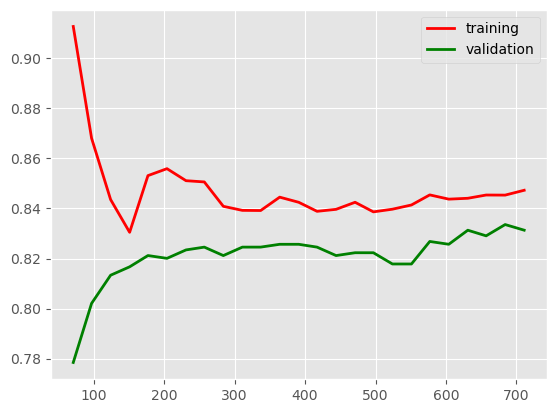

In [47]:
cvs(voting_classifier)
plot_learning_curve(voting_classifier)

In [48]:
X_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [49]:
X_test['Title'] = X_test['Name'].apply(get_title)

X_test['Cabin'].fillna('unknown', inplace=True)
X_test['Cabin_cat'] = X_test['Cabin'].apply(get_cabin)

X_test['Family_size'] = X_test['SibSp'] + X_test['Parch']

X_test = X_test.drop(['Name', 'PassengerId', 'Ticket', 'Cabin'], axis=1)

In [50]:
X_test['Survived'] = 0
X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Cabin_cat,Family_size,Survived
0,3,male,34.5,0,0,7.8292,Q,Mr,none,0,0
1,3,female,47.0,1,0,7.0000,S,Mrs,none,1,0
2,2,male,62.0,0,0,9.6875,Q,Mr,none,0,0
3,3,male,27.0,0,0,8.6625,S,Mr,none,0,0
4,3,female,22.0,1,1,12.2875,S,Mrs,none,2,0


In [51]:
encoded_data = ct.transform(X_test)
encoded_df = pd.DataFrame(encoded_data, columns=ct.get_feature_names_out())
X_test = encoded_df

In [52]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
X_test = pd.DataFrame(imputer.fit_transform(X_test), columns=X_test.columns)

In [53]:
X_test.drop('Survived', axis=1, inplace=True)

In [54]:
predictions = voting_classifier.predict(X_test)

In [55]:
sm_dict = {'PassengerId':p_id, 'Survived':predictions}
submission = pd.DataFrame(sm_dict)
submission['Survived'] = submission['Survived'].astype('int64')
submission.fillna(0, inplace=True)

In [56]:
submission.to_csv('submission.csv', index=False)